In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("iris.csv")
df.tail()
#df['Species'].unique()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
'' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'

'Iris-setosaIris-virginicaIris-versicolor'

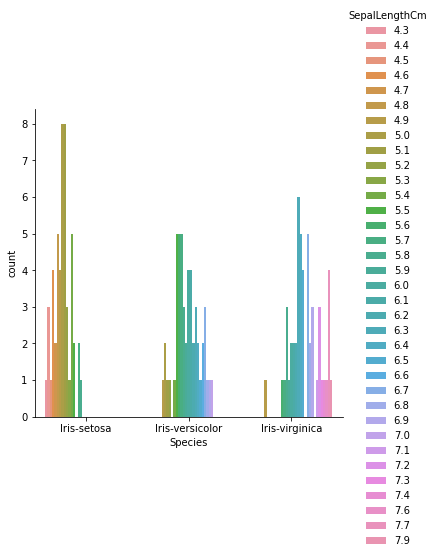

In [8]:
sns.catplot(x ="Species", hue ="SepalLengthCm",kind ="count", data = df)

#- `x`: This parameter specifies the variable to be plotted on the x-axis, which in this case is `"Species"`. The `"Species"` column contains the species of iris flowers.

#- `hue`: This parameter adds another categorical separation. In this case, `"SepalLengthCm"` is specified. The `hue` parameter adds color to the plot, and in this case, it is used to represent different Sepal Lengths of the iris flowers.

#- `kind`: This parameter specifies the type of plot to be drawn. In this case, `kind="count"` creates a count plot.

# `data`: This parameter specifies the DataFrame that contains the data to be plotted. In this case, it's `df`, which presumably is a DataFrame containing information about iris flowers.

#So, this `sns.catplot()` function will create a categorical plot with `"Species"` on the x-axis, different colors representing different Sepal Lengths (`"SepalLengthCm"`), and counts of each category.

<AxesSubplot:xlabel='Species', ylabel='Count'>

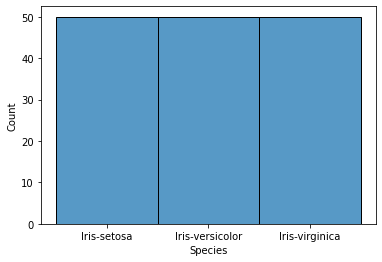

In [9]:
sns.histplot(data=df, x="Species")

5.843333333333335

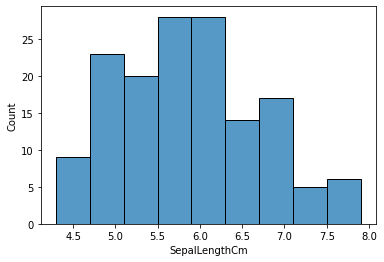

In [10]:
sns.histplot(x = df['SepalLengthCm'])
#Average sepallength lies between 5 -6
df['SepalLengthCm'].mean()

3.7586666666666693

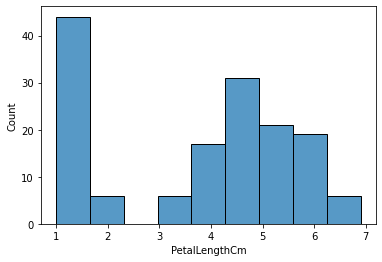

In [11]:
sns.histplot(x = df['PetalLengthCm'])
#Average sepalwidth lies between 4 -6
df['PetalLengthCm'].mean()

3.0540000000000007

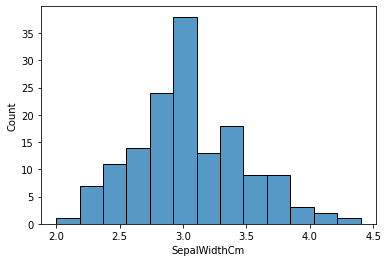

In [12]:
sns.histplot(x = df['SepalWidthCm'])
#Average sepalwidth lies between 2.5 -3.5
df['SepalWidthCm'].mean()

1.1986666666666672

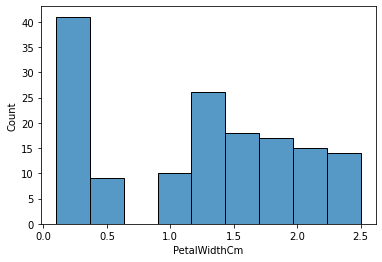

In [13]:
sns.histplot(x = df['PetalWidthCm'])
#Average petalwidth lies between 1 -2
df['PetalWidthCm'].mean()

<AxesSubplot:xlabel='SepalLengthCm'>

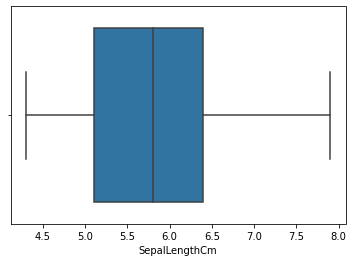

In [14]:
sns.boxplot(x=df['SepalLengthCm'])
#Median lies between 5.5 to 6

<AxesSubplot:xlabel='PetalLengthCm'>

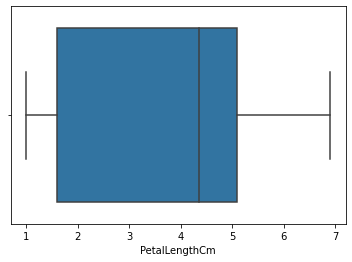

In [15]:
sns.boxplot(x=df['PetalLengthCm'])
#Median lies between 4 to 5

<AxesSubplot:xlabel='SepalWidthCm'>

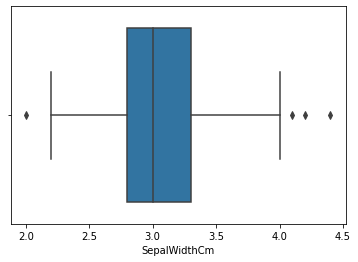

In [16]:
sns.boxplot(x=df['SepalWidthCm'])

<AxesSubplot:xlabel='PetalWidthCm'>

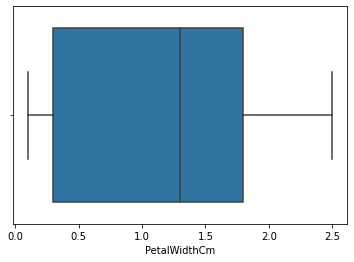

In [17]:
sns.boxplot(x=df['PetalWidthCm'])
#Median lies between 1 to 1.5

In [18]:
def RemoveOutlier(df,var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    high, low = Q3+1.5*IQR, Q1-1.5*IQR
    print("Highest allowed in variable:", var, high)
    print("lowest allowed in variable:", var, low)
    
    count = df[(df[var] > high) | (df[var] < low)][var].count()
    print('Total outliers in:',var,':',count)
    df = df[((df[var] >= low) & (df[var] <= high))]
    return df
    

In [19]:
df = RemoveOutlier(df, 'SepalWidthCm')


Highest allowed in variable: SepalWidthCm 4.05
lowest allowed in variable: SepalWidthCm 2.05
Total outliers in: SepalWidthCm : 4


<AxesSubplot:xlabel='SepalWidthCm'>

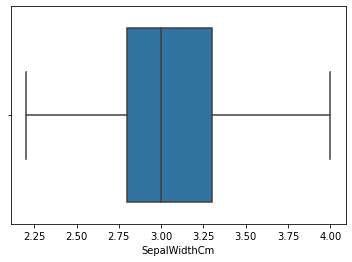

In [20]:
sns.boxplot(x=df['SepalWidthCm'])

In [21]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.718722,-0.384320,0.880016,0.898193
SepalLengthCm,0.718722,1.000000,-0.113977,0.879374,0.822577
SepalWidthCm,-0.384320,-0.113977,1.000000,-0.397123,-0.329782
PetalLengthCm,0.880016,0.879374,-0.397123,1.000000,0.961755
PetalWidthCm,0.898193,0.822577,-0.329782,0.961755,1.000000
